In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import pickle
import tensorflow as tf
from sklearn.svm import SVR

# **Step 1: Dataset Selection**

In [3]:
df = pd.read_csv('E:\CCBST\Projects\Housing_Forecast\Dataset\california.csv')

# **Step 2: Data Cleaning**

:Attribute Information:

    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude **bold text**

In [4]:
df.head()

,Unnamed: 0,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [8]:
# Check Null Values

df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [9]:
# Check Duplicate Values

df.duplicated().sum()

0

# **Step 3: Data Exploration**

## **Statistical Analysis**

In [10]:
# Statistical Summary

df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Observing max & 75% values, there maybe outliers for below features. We can see a huge difference.

 - AveRooms
 - AveBedrms
 - AveOccup
 - Population **bold text**

## **Visualization**

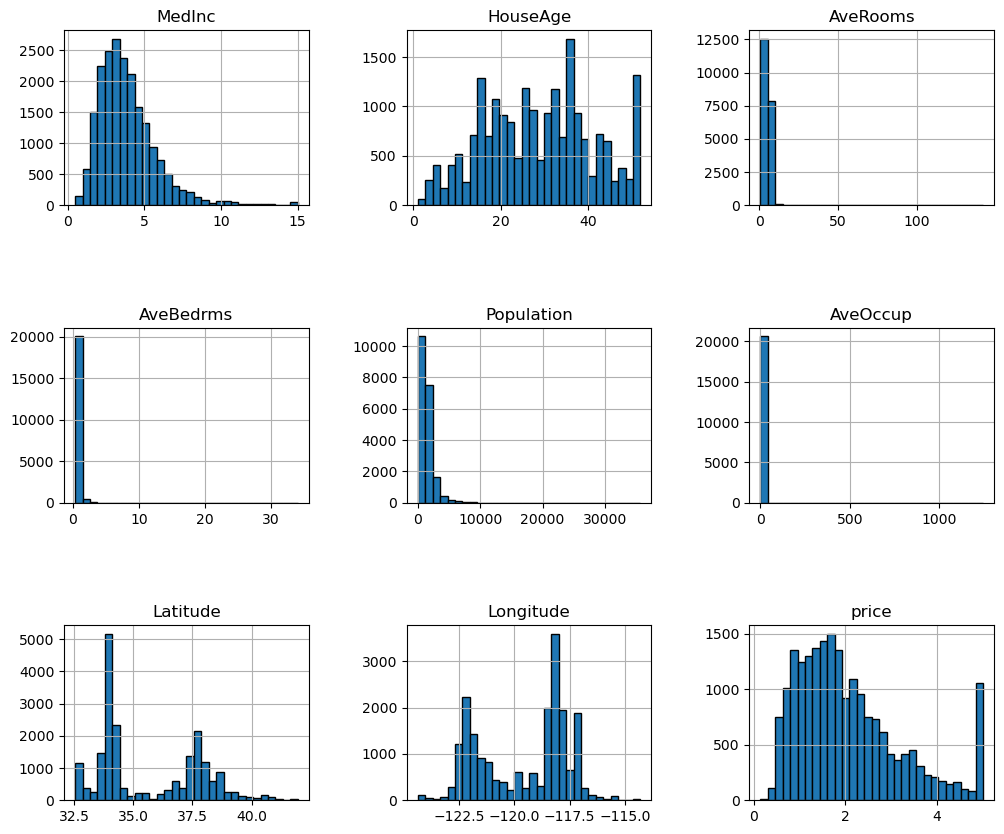

In [11]:
df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

**Observation:**

 - The median income is almost normally distributed with some people getting a high salary.
 - Average house age is also more or less normally distributed
 - Price distribution has a long tail as well.

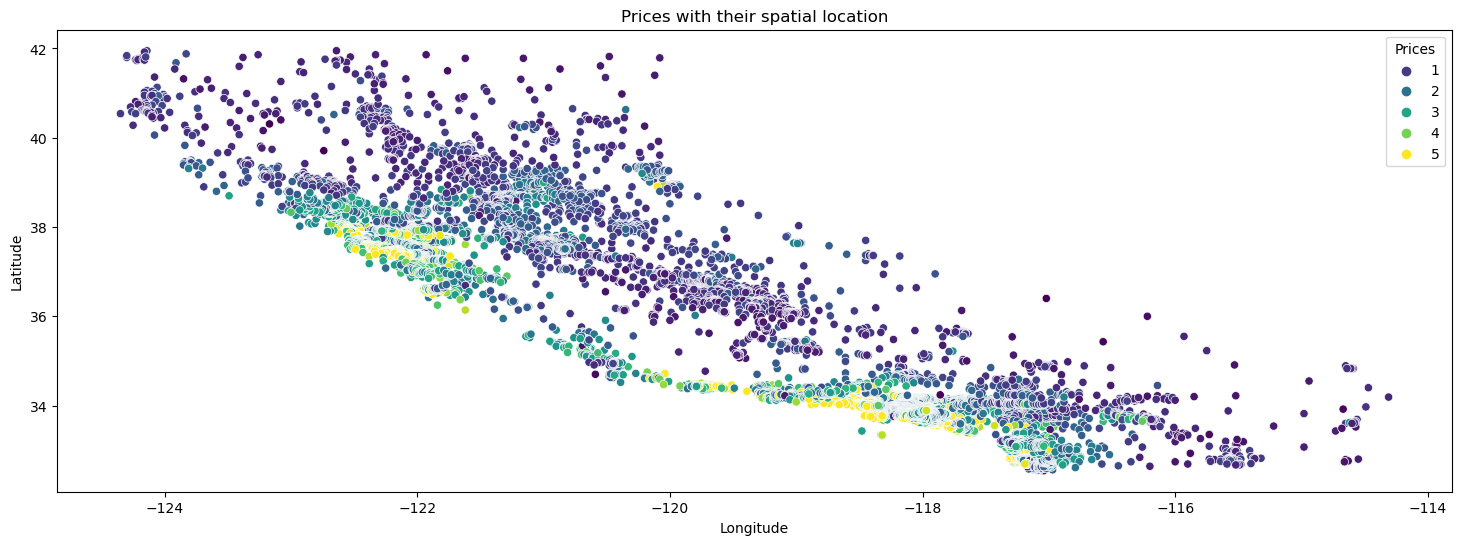

In [12]:
plt.figure(figsize=(18, 6))
sns.scatterplot(data=df, x="Longitude", y="Latitude", hue="price", palette="viridis")
plt.legend(title="Prices", loc="upper right")
plt.title("Prices with their spatial location")
plt.show()

# **Step 4: Model Selection**

**Choose multiple models for experimentation. For regression, you might use Linear Regression, Decision Trees, ANN models for regression . For classification, try Logistic Regression, Decision Trees, SVM, ANN.**

In [13]:
# Define Input and Target Variables

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [15]:
# split into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
# Standardize the Data

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## ***Linear Regression***

In [17]:
# Linear Regression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

In [19]:
# Evaluate the Model using Test Data
print('R2 Score with Test Data: ', r2_score(y_test, y_pred_test))

# Evaluate the Model using Train data
print('\nR2 Score with Train Data: ', r2_score(y_train, y_pred_train))

R2 Score with Test Data:  0.5943232652466204

R2 Score with Train Data:  0.6088968118672871


## ***Ridge Model***

In [23]:
%%time
rd = Ridge()
rd.fit(X_train, y_train)
y_pred_test_rd = rd.predict(X_test)
y_pred_train_rd = rd.predict(X_train)

print("Evaluation for Test Data:")
print('R2 Score: ', r2_score(y_test, y_pred_test_rd))

# evaluate the models using metrics on train data
print("\nEvaluation for Train Data:")
print('R2 Score for Train Data: ', r2_score(y_train, y_pred_train_rd))

print("\n Coefficients are as:\n")

column_feature = ['MedInc',	'HouseAge',	'AveRooms',	'AveBedrms',	'Population',	'AveOccup',	'Latitude',	'Longitude']
for i, col in enumerate(column_feature):
    print('The coefficient for {} is {}'.format(col, rd.coef_[i]))

Evaluation for Test Data:
R2 Score:  0.5943141338604156

Evaluation for Train Data:
R2 Score for Train Data:  0.6088967440330115

 Coefficients are as:

The coefficient for MedInc is 0.8262202576295187
The coefficient for HouseAge is 0.11718399803804956
The coefficient for AveRooms is -0.24875502200419417
The coefficient for AveBedrms is 0.290180125510074
The coefficient for Population is -0.008612575466338226
The coefficient for AveOccup is -0.030573898589506328
The coefficient for Latitude is -0.8996404375848027
The coefficient for Longitude is -0.8697983236722834
CPU times: total: 15.6 ms
Wall time: 22.9 ms


## ***DecisionTree Regressor***

In [24]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred_dtc_reg = model.predict(X_test)

In [25]:
print('R2 Score: ', r2_score(y_test, y_pred_dtc_reg))

R2 Score:  0.5831159211798491


## ***SVR Model***

In [26]:
svr_lin = SVR(kernel='rbf')
svr_lin.fit(X_train, y_train)

SVR()

In [27]:
y_pred_svr_lin = svr_lin.predict(X_test)
print('SVR R2 Score:', r2_score(y_test, y_pred_svr_lin))

SVR R2 Score: 0.7462243656257977


## ***ANN Model***

In [28]:
# build the ANN Model

ann = tf.keras.models.Sequential()

In [29]:
ann.add(tf.keras.layers.Dense(units=200, activation='relu', input_shape=(8,)))
ann.add(tf.keras.layers.Dense(units=175, activation='relu'))
ann.add(tf.keras.layers.Dense(units=150, activation='relu'))
ann.add(tf.keras.layers.Dense(units=100, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='linear'))
ann.compile(optimizer='adam', loss='mean_squared_error')
ann.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.9667
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3590
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3232
Epoch 4/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3139
Epoch 5/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3056
Epoch 6/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2963
Epoch 7/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2888
Epoch 8/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3022
Epoch 9/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2776
Epoch 10/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2767
Epoch 11/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2653
Epoch 12/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2701
Epoch 13/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2520
Epoch 14/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2461
Epoch 15/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1

In [30]:
y_pred_ann = ann.predict(X_test)
print('ANN R2 Score: ', r2_score(y_test, y_pred_ann))

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
ANN R2 Score:  0.7685038613100129


# **Step 5: Hyperparameter Tuning**

## ***Ridge Model Hyperparameter Tunning with GridSearchCV***

In [31]:
# Define the hyperparameter grid
parameters = {'alpha': [0.01, 0.1, 1, 5, 10],
           'solver':['lbfgs','sag', 'newton-cg'],
             'random_state':[42]}

# Initialize GridSearchCV
grid_search_rd = GridSearchCV(estimator=rd, param_grid = parameters, cv=5)

# Perform the grid search
grid_search_rd.fit(X_train,y_train)

# Get the best parameters and the corresponding score
best_params = grid_search_rd.best_params_
best_score = grid_search_rd.best_score_

print(f'Hyperparameters Analysis for Linear Regression using Ridge Model:\n')
print(f'Best Hyperparameters: {best_params}\n')
print(f'Best Score: {best_score}')

Hyperparameters Analysis for Linear Regression using Ridge Model:

Best Hyperparameters: {'alpha': 10, 'random_state': 42, 'solver': 'sag'}

Best Score: 0.6053962003449749


## ***DecisionTree Regressor Hyperparameter Tunning with GridSearchCV***

In [32]:
parameters = {'criterion':['squared_error', 'mean_squared_error', 'friedman_mse', 'poisson'], 'splitter':['best', 'random'],
              'max_depth':[1,2,3,4,5,7,9,11],'max_features':['sqrt','log2','auto']}

grid_dtc_log_reg = GridSearchCV(estimator=model, param_grid=parameters, cv=5, scoring='neg_mean_squared_error')
grid_dtc_log_reg.fit(X_train, y_train)

y_pred_grid_dtc_reg = grid_dtc_log_reg.predict(X_test)
r2_score(y_test, y_pred_grid_dtc_reg)

0.6547303098978614

In [34]:
# Evaluate the Linear Regression Model
print("Evaluation of Linear Regression:")
print('Linear Regression R2 Score: ', r2_score(y_test, y_pred_test))

# Evaluate the Ridge Model
print("Evaluation of Ridge Model:")
print('Ridge R2 Score: ', r2_score(y_test, y_pred_test_rd))

# Evaluate the DecisionTree Regressor
print("Evaluation of DecisionTree Regressor:")
print('DecisionTree R2 Score: ', r2_score(y_test, y_pred_dtc_reg))

# Evaluate the SVR Model
print('SVR R2 Score:', r2_score(y_test, y_pred_svr_lin))

# Evaluate the ANN Model
print('ANN R2 Score: ', r2_score(y_test, y_pred_ann))

# Evaluate the Ridge Model with GridSearchCV
print(f'Hyperparameters Analysis for Linear Regression using Ridge Model:\n')
print(f'Best Hyperparameters: {best_params}\n')
print(f'Best Score: {best_score}')

# Evaluate the DecisionTree Regressor with GridSearchCV
print('DecissionTree GridSearchCV R2 Score: ', r2_score(y_test, y_pred_grid_dtc_reg))


Evaluation of Linear Regression:
Linear Regression R2 Score:  0.5943232652466204
Evaluation of Ridge Model:
Ridge R2 Score:  0.5943141338604156
Evaluation of DecisionTree Regressor:
DecisionTree R2 Score:  0.5831159211798491
SVR R2 Score: 0.7462243656257977
ANN R2 Score:  0.7685038613100129
Hyperparameters Analysis for Linear Regression using Ridge Model:

Best Hyperparameters: {'alpha': 10, 'random_state': 42, 'solver': 'sag'}

Best Score: 0.6053962003449749
DecissionTree GridSearchCV R2 Score:  0.6547303098978614


# **Step 6: Pickle Files**

In [35]:
pickle.dump(sc_X, open('sc_california_housing.pkl', 'wb'))
ann.save('ann_california_housing.h5')
pickle.dump(svr_lin, open('svr_california_housing.pkl', 'wb'))